In [2]:
import pandas as pd
from collections import Counter
from langdetect import detect
from pathlib import Path
import langdetect
import numpy as np
import importlib
import os
current_dir = os.getcwd()
%cd ..
import textmining.text_miner 
import textmining.loader  as loader
import textmining.topic_modeler as tm
import textmining.significance_testing as significance_testing
import textmining.utility as utility
import textmining.analysis as analysis
import textmining.news_editorials_experiments as experiment
import textmining.cross_models_significance as cross

importlib.reload(textmining.news_editorials_experiments)
importlib.reload(textmining.cross_models_significance)
importlib.reload(textmining.machine_learning)
importlib.reload(textmining.text_miner)
importlib.reload(textmining.topic_modeler)
importlib.reload(textmining.analysis)
os.chdir(current_dir)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
load = loader.loader()
corpus = load.corpus
corpus = load.add_ideology_intensity()

corpus.columns.values


"corpus" is set. It contains the 6000 annotation
"corpus" is set with ideology_intensity: "extreme" and "lean"


array(['annotator_id', 'article_id', 'political_typology', 'effect',
       'explanation', 'article_index', 'change', 'empower',
       'date_created', 'political_pole', 'effect_abstracted', 'batch',
       'intensity', 'ideology_intensity'], dtype=object)

In [47]:
corpus.ideology_intensity.value_counts(), corpus.political_pole.value_counts()

(lean       3500
 extreme    2500
 Name: ideology_intensity, dtype: int64, conservative    3000
 liberal         3000
 Name: political_pole, dtype: int64)

In [48]:
#1:'challenging', 2:'no_effect', 3:'reinforcing'
pd.crosstab(corpus.ideology_intensity, corpus.effect_abstracted), pd.crosstab(corpus.ideology_intensity, corpus.effect)

(effect_abstracted     1     2     3
 ideology_intensity                 
 extreme             334   631  1535
 lean                353  1359  1788,
 effect               1    2     3     4    5
 ideology_intensity                          
 extreme             85  249   631  1012  523
 lean                58  295  1359  1188  600)

In [49]:
intesity_maj_df = load.get_article_dfs_per_ideology(ideology = 'ideology_intensity', include_content = True)

articles dataframe for ideology extreme was created
The id of the df is the article id without txt
total con: 979
rounded TRAINGING data:  783
rounded Validation data:  0
rounded Test data:  196
total con: 1000
rounded TRAINGING data:  800
rounded Validation data:  0
rounded Test data:  200
"data_division" is set as dict with keys  dict_keys(['train', 'test'])
"corpus" is set with split_label: "train" "test"
"data_division" is set as dict with keys  dict_keys(['train', 'test'])
length of self.df:  979
length of self.data_division_df:  979
length of self.df:  979
articles dataframe for ideology lean was created
The id of the df is the article id without txt
total con: 979
rounded TRAINGING data:  783
rounded Validation data:  0
rounded Test data:  196
total con: 1000
rounded TRAINGING data:  800
rounded Validation data:  0
rounded Test data:  200
"data_division" is set as dict with keys  dict_keys(['train', 'test'])
"corpus" is set with split_label: "train" "test"
"data_division" is set

In [50]:
extreme_df = intesity_maj_df['extreme']
lean_df = intesity_maj_df['lean']

In [51]:
extreme_df.no_annotation.value_counts(), extreme_df.multi_majority.value_counts()
#extreme_df[extreme_df['multi_majority'] == True].majority_int.value_counts()

(False    979
 Name: no_annotation, dtype: int64, False    893
 True      86
 Name: multi_majority, dtype: int64)

In [52]:
lean_df.no_annotation.value_counts(), lean_df.multi_majority.value_counts()
lean_df[lean_df['multi_majority'] == True]

,content,challenging,no_effect,reinforcing,ids,majority,majority_int,no_annotation,multi_majority,split_label
idx,,,,,,,,,,
1844646,A bill headed for a vote in the Senate would u...,1.0,1.0,1.0,1844646,challenging,0,False,True,test
1830073,A famous hunter and outdoorsman recently voice...,1.0,2.0,2.0,1830073,reinforcing,2,False,True,test
1832892,A federal appeals court panel in Washington ha...,1.0,1.0,1.0,1832892,challenging,0,False,True,test
1840421,A first look at the drawing of the latest deve...,1.0,1.0,1.0,1840421,challenging,0,False,True,test
1639627,A lot could go wrong with Iraq's elections on ...,2.0,1.0,2.0,1639627,challenging,0,False,True,train
...,...,...,...,...,...,...,...,...,...,...
1657678,When asked why he had nominated Paul Wolfowitz...,1.0,1.0,1.0,1657678,challenging,0,False,True,train
1812813,When federal immigration officials raided six ...,1.0,1.0,1.0,1812813,challenging,0,False,True,train
1644193,Whenever we hear the words Hudson River and PC...,1.0,1.0,1.0,1644193,challenging,0,False,True,train


In [53]:
print(intesity_maj_df['extreme'].majority.value_counts())
#reinforcing    617
# challenging    199
# no_effect      163


print(intesity_maj_df['lean'].majority.value_counts())
#reinforcing    514
# no_effect      344
# challenging    121

reinforcing    617
challenging    199
no_effect      163
Name: majority, dtype: int64
reinforcing    514
no_effect      344
challenging    121
Name: majority, dtype: int64


In [77]:
print(lean_df.split_label.value_counts())
print()
print(extreme_df.split_label.value_counts())
print()
print()
print(pd.crosstab(lean_df.lean_majority, lean_df.split_label))
print()
print(pd.crosstab(extreme_df.extreme_majority, extreme_df.split_label))


train    783
test     196
Name: split_label, dtype: int64

train    783
test     196
Name: split_label, dtype: int64


split_label    test  train
lean_majority             
challenging      21    100
no_effect        70    274
reinforcing     105    409

split_label       test  train
extreme_majority             
challenging         43    156
no_effect           30    133
reinforcing        123    494


In [55]:
extreme_df.rename(columns = {'majority': 'extreme_majority'}, inplace = True)
lean_df.rename(columns = {'majority': 'lean_majority'}, inplace = True)


In [56]:
data = pd.read_json('../data/articles_with_adu_liwc_lexicons_content.json', orient='records')
data.set_index('idx', inplace=True)
print(len(data))
data = data.merge(extreme_df[['extreme_majority']], how="inner",left_index=True, right_index=True )
data = data.merge(lean_df[['lean_majority']], how="inner",left_index=True, right_index=True )



979


In [74]:
data.drop(['liberal_majority', 'conservative_majority'], axis=1, inplace=True)
data.to_csv('../data/intensity_all_features.csv')

In [57]:
training_df, test_df = analysis.get_train_test(data)

In [58]:
numeric_features_list = list(training_df.select_dtypes(include=[np.number]))
#utility.create_dirs('out/significance/')
print("Extreme")

extreme_significance = significance_testing.significance(training_df, features = numeric_features_list, 
                                   save = True, desc='../out/significance/extreme_trainset', 
                                   independent_var='extreme_majority',
                                   p_value_threshold = 0.05)
print("\nLean")
lean_significance = significance_testing.significance(training_df, features = numeric_features_list, 
                                   save = True, desc='../out/significance/lean_trainset', 
                                   independent_var='lean_majority',
                                   p_value_threshold = 0.05)

Extreme
data has 783 instances
bonforrini_threshold:  0.016666666666666666
exception for feature  All numbers are identical in kruskal
liwc_scores_categories_Exclam
INNER EXCEPTION All numbers are identical in mannwhitneyu
liwc_scores_categories_Quote
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma2_hedg fund
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma2_privat account
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_arm servic committe
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_bigger better bottl
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_electron vote machin
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_good govern advoc
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_health human servic
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_senat judiciari committe
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_york state bud

In [59]:

extreme_effectsize_filtered = analysis.get_sign_features_hm(extreme_significance )
lean_effectsize_filtered = analysis.get_sign_features_hm(lean_significance )


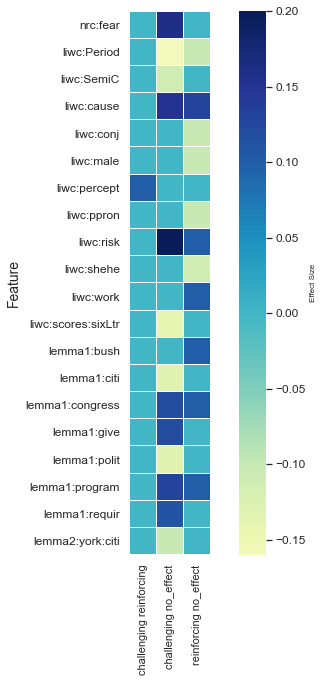

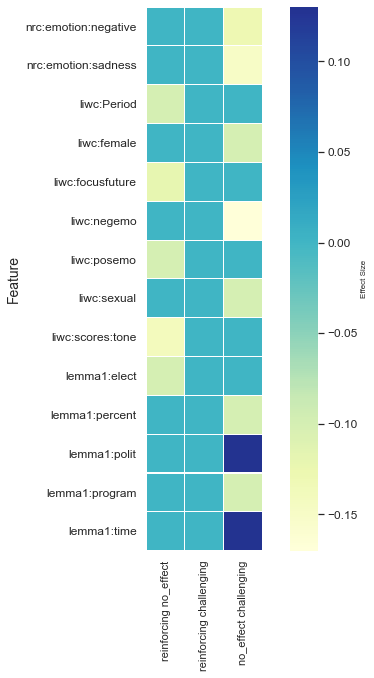

In [73]:
#'Extreme Ideology - Effect Size (Whole Editorial)'
analysis.plot_hm(extreme_effectsize_filtered, 
        filename='heatmap_effectsize_extreme.pdf' )

#'lean Ideology - Effect Size (Whole Editorial)'
analysis.plot_hm(lean_effectsize_filtered, 
        filename='heatmap_effectsize_lean.pdf' )

## Training models

In [3]:
df = pd.read_csv('../data/intensity_all_features.csv', index_col='idx')


In [3]:

results_standard = experiment.run_experiments(df, ideologies=['extreme_majority', 'lean_majority'],
                                    filename="../out/style_content_models_results/intensity_experiments_standard.csv", 
                                    remove_outliers=True,
                                    normalize="standard")

running experiments for ideologies:  ['extreme_majority', 'lean_majority'] 
 remove_outliers:  True 
 normalize:  standard
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
('liwc',)   macro-f1:  0.32 time(s):  239.083
-------------------------------------------
('nrc',)   macro-f1:  0.33 time(s):  4.046
-------------------------------------------
('mpqa_arg',)   macro-f1:  0.33 time(s):  6.457
-------------------------------------------
('mpqa_subjobg',)   macro-f1:  0.25 time(s):  0.527
-------------------------------------------
('adu',)   macro-f1:  0.32 time(s):  1.578
-------------------------------------------
('lemma',)   macro-f1:  0.34 time(s):  48.478
-------------------------------------------
('liwc', 'nrc')

('liwc', 'nrc')   macro-f1:  0.29 time(s):  234.466
-------------------------------------------
('liwc', 'mpqa_arg')   macro-f1:  0.31 time(s):  254.578
-------------------------------------------
('liwc', 'mpqa_subjobg')   macro-f1:  0.32 time(s):  178.231
-------------------------------------------
('liwc', 'adu')   macro-f1:  0.28 time(s):  220.881
-------------------------------------------
('liwc', 'lemma')   macro-f1:  0.3 time(s):  147.675
-------------------------------------------
('nrc', 'mpqa_arg')   macro-f1:  0.3 time(s):  20.408
-------------------------------------------
('nrc', 'mpqa_subjobg')   macro-f1:  0.31 time(s):  4.715
-------------------------------------------
('nrc', 'adu')   macro-f1:  0.29 time(s):  5.109
-------------------------------------------
('nrc', 'lemma')   macro-f1:  0.34 time(s):  211.817
-------------------------------------------
('mpqa_arg', 'mpqa_subjobg')   macro-f1:  0.32 time(s):  6.984
-------------------------------------------
('mpqa_a

In [4]:
results_log = experiment.run_experiments(df, ideologies=['extreme_majority', 'lean_majority'],
                                    filename="../out/style_content_models_results/intensity_experiments_log.csv", 
                                    remove_outliers=True,
                                    normalize="log")

running experiments for ideologies:  ['extreme_majority', 'lean_majority'] 
 remove_outliers:  True 
 normalize:  log
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
('liwc',)   macro-f1:  0.28 time(s):  2.186
-------------------------------------------
('nrc',)   macro-f1:  0.34 time(s):  1.247
-------------------------------------------
('mpqa_arg',)   macro-f1:  0.29 time(s):  1.512
-------------------------------------------
('mpqa_subjobg',)   macro-f1:  0.23 time(s):  0.279
-------------------------------------------
('adu',)   macro-f1:  0.34 time(s):  0.424
-------------------------------------------
('lemma',)   macro-f1:  0.33 time(s):  4.657
-------------------------------------------
('liwc', 'nrc')   macro-f1:  0.35 time(s):  4.026
-------------

('liwc', 'mpqa_subjobg')   macro-f1:  0.3 time(s):  2.462
-------------------------------------------
('liwc', 'adu')   macro-f1:  0.31 time(s):  2.874
-------------------------------------------
('liwc', 'lemma')   macro-f1:  0.37 time(s):  6.338
-------------------------------------------
('nrc', 'mpqa_arg')   macro-f1:  0.27 time(s):  2.974
-------------------------------------------
('nrc', 'mpqa_subjobg')   macro-f1:  0.29 time(s):  2.103
-------------------------------------------
('nrc', 'adu')   macro-f1:  0.3 time(s):  2.466
-------------------------------------------
('nrc', 'lemma')   macro-f1:  0.36 time(s):  6.383
-------------------------------------------
('mpqa_arg', 'mpqa_subjobg')   macro-f1:  0.32 time(s):  1.308
-------------------------------------------
('mpqa_arg', 'adu')   macro-f1:  0.31 time(s):  1.913
-------------------------------------------
('mpqa_arg', 'lemma')   macro-f1:  0.37 time(s):  6.267
-------------------------------------------
('mpqa_subjobg',

{'extreme_majority':     macro  micro  accuracy  challenging  no_effect  reinforcing  \
 0    0.28   0.32      0.32         0.24       0.17         0.43   
 1    0.34   0.35      0.35         0.33       0.32         0.39   
 2    0.29   0.30      0.30         0.34       0.25         0.29   
 3    0.23   0.27      0.27         0.31       0.09         0.29   
 4    0.34   0.42      0.42         0.27       0.19         0.56   
 ..    ...    ...       ...          ...        ...          ...   
 58   0.32   0.38      0.38         0.28       0.16         0.51   
 59   0.31   0.37      0.37         0.30       0.16         0.48   
 60   0.33   0.38      0.38         0.27       0.22         0.50   
 61   0.33   0.38      0.38         0.31       0.18         0.50   
 62   0.31   0.37      0.37         0.27       0.17         0.49   
 
                                     params  \
 0   {'C': 100, 'class_weight': 'balanced'}   
 1    {'C': 10, 'class_weight': 'balanced'}   
 2   {'C': 0.1, 'clas

In [5]:
results_minmax = experiment.run_experiments(df, ideologies=['extreme_majority', 'lean_majority'],
                                    filename="../out/style_content_models_results/intensity_experiments_minmax.csv", 
                                    remove_outliers=True,
                                    normalize="minmax")

running experiments for ideologies:  ['extreme_majority', 'lean_majority'] 
 remove_outliers:  True 
 normalize:  minmax
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
('liwc',)   macro-f1:  0.29 time(s):  9.145
-------------------------------------------
('nrc',)   macro-f1:  0.33 time(s):  0.465
-------------------------------------------
('mpqa_arg',)   macro-f1:  0.31 time(s):  0.724
-------------------------------------------
('mpqa_subjobg',)   macro-f1:  0.3 time(s):  0.252
-------------------------------------------
('adu',)   macro-f1:  0.32 time(s):  0.334
-------------------------------------------
('lemma',)   macro-f1:  0.32 time(s):  6.674
-------------------------------------------
('liwc', 'nrc')   macro-f1:  0.32 time(s):  10.328
----------

('liwc', 'mpqa_subjobg')   macro-f1:  0.32 time(s):  12.162
-------------------------------------------
('liwc', 'adu')   macro-f1:  0.33 time(s):  9.046
-------------------------------------------
('liwc', 'lemma')   macro-f1:  0.37 time(s):  6.98
-------------------------------------------
('nrc', 'mpqa_arg')   macro-f1:  0.34 time(s):  1.548
-------------------------------------------
('nrc', 'mpqa_subjobg')   macro-f1:  0.3 time(s):  0.499
-------------------------------------------
('nrc', 'adu')   macro-f1:  0.3 time(s):  0.678
-------------------------------------------
('nrc', 'lemma')   macro-f1:  0.38 time(s):  11.166
-------------------------------------------
('mpqa_arg', 'mpqa_subjobg')   macro-f1:  0.32 time(s):  1.14
-------------------------------------------
('mpqa_arg', 'adu')   macro-f1:  0.32 time(s):  1.247
-------------------------------------------
('mpqa_arg', 'lemma')   macro-f1:  0.37 time(s):  11.313
-------------------------------------------
('mpqa_subjobg'

In [88]:
experiment.train_baseline(df, 'extreme_majority')

removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
Normalizing by using standard scaler...
end of get_x_y.


{'macro': 0.27,
 'micro': 0.28,
 'challenging': 0.28,
 'no_effect': 0.21,
 'reinforcing': 0.31}

In [89]:
experiment.train_baseline(df, 'lean_majority')

removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
Normalizing by using standard scaler...
end of get_x_y.


{'macro': 0.32,
 'micro': 0.34,
 'challenging': 0.18,
 'no_effect': 0.43,
 'reinforcing': 0.36}

## Significance between models

In [4]:
PATH_RESULT_EXTREME = '../out/style_content_models_results/intensity/intensity_experiments_{}_extreme_majority.csv'

extreme_cross_models_sqrt_df    = cross.run_model_pairs_significance(PATH_RESULT_EXTREME.format('sqrt'), df,'extreme_majority', 'sqrt'    , 'sqrt_extreme' )
extreme_cross_models_standard_df= cross.run_model_pairs_significance(PATH_RESULT_EXTREME.format('standard'), df,'extreme_majority', 'standard', 'standard_extreme' )
extreme_cross_models_log_df     = cross.run_model_pairs_significance(PATH_RESULT_EXTREME.format('log'), df,'extreme_majority', 'log'     , 'log_extreme' )
extreme_cross_models_minmax_df  = cross.run_model_pairs_significance(PATH_RESULT_EXTREME.format('minmax'), df,'extreme_majority', 'minmax'   , 'minmax_extreme' )

preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('lemma',)) 2
('dummy',)
('lemma',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('nrc', 'mpqa_arg', 'mpqa_subjobg')) 2
('dummy',)
('nrc', 'mpqa_arg', 'mpqa_subjobg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('nrc', 'mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')) 2
('dummy',)
('nrc', 'mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('nrc', 'mpqa_arg', 'mpqa_subjobg')) 2
('lemma',)
('nrc', 'mpqa_arg', 'mpqa_subjobg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('nrc', 'mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')) 2
('lemma',)
('nrc', 'mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('nrc', 'mpqa_arg', 'mpqa_subjobg'), ('nrc', 'mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')) 2
('nrc', 'mpqa_arg', 'mpqa_subjobg')
('nrc', 'mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('lemma',)) 2
('dummy',)
('lemma',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'nrc', 'mpqa_subjobg')) 2
('dummy',)
('liwc', 'nrc', 'mpqa_subjobg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'mpqa_subjobg', 'lemma')) 2
('dummy',)
('liwc', 'mpqa_subjobg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'mpqa_arg', 'lemma')) 2
('dummy',)
('liwc', 'mpqa_arg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('liwc', 'nrc', 'mpqa_subjobg')) 2
('lemma',)
('liwc', 'nrc', 'mpqa_subjobg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('liwc', 'mpqa_subjobg', 'lemma')) 2
('lemma',)
('liwc', 'mpqa_subjobg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('liwc', 'mpqa_arg', 'lemma')) 2
('lemma',)
('liwc', 'mpqa_arg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_subjobg'), ('liwc', 'mpqa_subjobg', 'lemma')) 2
('liwc', 'nrc', 'mpqa_subjobg')
('liwc', 'mpqa_subjobg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_subjobg'), ('liwc', 'mpqa_arg', 'lemma')) 2
('liwc', 'nrc', 'mpqa_subjobg')
('liwc', 'mpqa_arg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
Normalizing by using standard scaler...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'mpqa_subjobg', 'lemma'), ('liwc', 'mpqa_arg', 'lemma')) 2
('liwc', 'mpqa_subjobg', 'lemma')
('liwc', 'mpqa_arg', 'lemma')
preprocessing data...


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('lemma',)) 2
('dummy',)
('lemma',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'nrc', 'mpqa_arg')) 2
('dummy',)
('liwc', 'nrc', 'mpqa_arg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('mpqa_arg', 'adu', 'lemma')) 2
('dummy',)
('mpqa_arg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('liwc', 'nrc', 'mpqa_arg')) 2
('lemma',)
('liwc', 'nrc', 'mpqa_arg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('mpqa_arg', 'adu', 'lemma')) 2
('lemma',)
('mpqa_arg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_arg'), ('mpqa_arg', 'adu', 'lemma')) 2
('liwc', 'nrc', 'mpqa_arg')
('mpqa_arg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('lemma',)) 2
('dummy',)
('lemma',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'nrc', 'mpqa_subjobg')) 2
('dummy',)
('liwc', 'nrc', 'mpqa_subjobg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('mpqa_arg', 'adu', 'lemma')) 2
('dummy',)
('mpqa_arg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('liwc', 'nrc', 'mpqa_subjobg')) 2
('lemma',)
('liwc', 'nrc', 'mpqa_subjobg')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('mpqa_arg', 'adu', 'lemma')) 2
('lemma',)
('mpqa_arg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


getting X y data...
end of get_x_y.
END of preprocessing
extreme_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_subjobg'), ('mpqa_arg', 'adu', 'lemma')) 2
('liwc', 'nrc', 'mpqa_subjobg')
('mpqa_arg', 'adu', 'lemma')


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [10]:
extreme_cross_models_log_df

,model_pair,is_normal,stat,p_val,significant,data
0,"((dummy,), (lemma,))",False,0.0,0.043114,True,"{'('dummy',)': [0.33, 0.22, 0.27, 0.15, 0.28],..."
1,"((dummy,), (liwc, nrc, mpqa_arg))",False,0.0,0.043114,True,"{'('dummy',)': [0.33, 0.22, 0.27, 0.15, 0.28],..."
2,"((dummy,), (mpqa_arg, adu, lemma))",False,0.0,0.043114,True,"{'('dummy',)': [0.33, 0.22, 0.27, 0.15, 0.28],..."
3,"((lemma,), (liwc, nrc, mpqa_arg))",False,2.0,0.138011,False,"{'('lemma',)': [0.4233589087809036, 0.23515064..."
4,"((lemma,), (mpqa_arg, adu, lemma))",False,1.0,0.079616,False,"{'('lemma',)': [0.4233589087809036, 0.23515064..."
5,"((liwc, nrc, mpqa_arg), (mpqa_arg, adu, lemma))",False,6.0,0.685830,False,"{'('liwc', 'nrc', 'mpqa_arg')': [0.48419599723..."


In [173]:
PATH_RESULT_LEAN = '../out/style_content_models_results/intensity/intensity_experiments_{}_lean_majority.csv'

lean_cross_models_sqrt_df    = cross.run_model_pairs_significance(PATH_RESULT_LEAN.format('sqrt'), df,'lean_majority', 'sqrt'    , 'sqrt_lean' )
lean_cross_models_standard_df= cross.run_model_pairs_significance(PATH_RESULT_LEAN.format('standard'), df,'lean_majority', 'standard', 'standard_lean' )
lean_cross_models_log_df     = cross.run_model_pairs_significance(PATH_RESULT_LEAN.format('log'), df,'lean_majority', 'log'     , 'log_lean' )
lean_cross_models_minmax_df  = cross.run_model_pairs_significance(PATH_RESULT_LEAN.format('minmax'), df,'lean_majority', 'minmax'   , 'minmax_lean' )

preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('lemma',)) 2
('dummy',)
('lemma',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('mpqa_arg', 'mpqa_subjobg', 'adu')) 2
('dummy',)
('mpqa_arg', 'mpqa_subjobg', 'adu')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('mpqa_a

preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'nrc', 'mpqa_arg', 'adu')) 2
('dummy',)
('liwc', 'nrc', 'mpqa_arg', 'adu')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('liwc', 'nrc', 'lemma')) 2
('dummy',)
('liwc', 'nrc', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++

getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('nrc', 'lemma')) 2
('dummy',)
('nrc', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('mpqa_arg', 'mpqa_subjobg', 'lemma')) 2
('dummy',)
('mpqa_arg', 'mpqa_subjobg', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('dummy',), ('mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')) 2
('dummy',)
('mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')
preprocessing data...
removing outliers by clipp

c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('nrc',)) 2
('lemma',)
('nrc',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('adu', 'lemma')) 2
('lemma',)
('adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('lemma',), ('nrc', 'lemma')) 2
('lemma',)
('nrc', 'lemma')
pr

getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_subjobg', 'adu'), ('nrc',)) 2
('liwc', 'nrc', 'mpqa_subjobg', 'adu')
('nrc',)
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_subjobg', 'adu'), ('adu', 'lemma')) 2
('liwc', 'nrc', 'mpqa_subjobg', 'adu')
('adu', 'lemma')
preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('liwc', 'nrc', 'mpqa_subjobg', 'adu'), ('nrc', 'lemma')) 2
('liwc', 'nrc', 'mpqa_subjobg', 'adu')
('nrc', 'le

c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('mpqa_arg', 'mpqa_subjobg', 'lemma'), ('liwc', 'nrc', 'mpqa_arg', 'lemma')) 2
('mpqa_arg', 'mpqa_subjobg', 'lemma')
('liwc', 'nrc', 'mpqa_arg', 'lemma')


c:\programdata\miniconda3\lib\site-packages\scipy\stats\morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


preprocessing data...
removing outliers by clipping values...
getting only numeric features from the training set...
There are 428  numeric features out of 434
getting X y data...
end of get_x_y.
END of preprocessing
lean_majority
+++++++++++++++++++++++++++++++++++++++++++++
(('mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma'), ('liwc', 'nrc', 'mpqa_arg', 'lemma')) 2
('mpqa_arg', 'mpqa_subjobg', 'adu', 'lemma')
('liwc', 'nrc', 'mpqa_arg', 'lemma')


In [178]:
lean_cross_models_sqrt_df #
lean_cross_models_standard_df
lean_cross_models_log_df
lean_cross_models_minmax_df

,model_pair,is_normal,stat,p_val,significant,data
0,"((dummy,), (lemma,))",True,-0.652307,0.549790,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
1,"((dummy,), (liwc, nrc, mpqa_subjobg))",True,-0.031720,0.976215,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
2,"((dummy,), (liwc, nrc, adu))",True,0.000275,0.999794,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
3,"((dummy,), (liwc, nrc, mpqa_subjobg, adu))",True,-0.099418,0.925590,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
4,"((dummy,), (nrc,))",True,-0.217419,0.838522,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
5,"((dummy,), (adu, lemma))",True,-0.743500,0.498477,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
6,"((dummy,), (nrc, lemma))",True,-0.818622,0.458967,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
7,"((dummy,), (mpqa_arg, mpqa_subjobg, lemma))",True,-0.850405,0.443009,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
8,"((dummy,), (mpqa_arg, mpqa_subjobg, adu, lemma))",True,-0.862974,0.436822,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."
9,"((dummy,), (liwc, nrc, mpqa_arg, lemma))",True,-0.634201,0.560407,False,"{'('dummy',)': [0.41, 0.37, 0.27, 0.41, 0.25],..."


In [17]:
extreme = pd.read_csv('../out/style_content_models_results/intensity/intensity_experiments_log_extreme_majority.csv')
lean = pd.read_csv('../out/style_content_models_results/intensity/intensity_experiments_log_lean_majority.csv')

In [26]:
extreme_arr = [{"feature": 'liwc', 'macro': 0.28},
             {"feature": 'emotion', 'macro': 0.34},
             {"feature": 'evidence', 'macro': 0.34},
             {"feature": 'arguing', 'macro': 0.29},
             {"feature": 'subjectivity', 'macro': 0.23},
             {"feature": 'Top Style', 'macro': 0.40},
             {"feature": 'Content (lemma)', 'macro': 0.33},
             {"feature": 'Top Content+Style', 'macro': 0.38},]

lean_arr = [{"feature": 'liwc', 'macro': 0.29},
             {"feature": 'emotion', 'macro': 0.32},
             {"feature": 'evidence', 'macro': 0.28},
             {"feature": 'arguing', 'macro': 0.34},
             {"feature": 'subjectivity', 'macro': 0.21},
             {"feature": 'Top Style', 'macro': 0.35},
             {"feature": 'Content (lemma)', 'macro': 0.37},
             {"feature": 'Top Content+Style', 'macro': 0.42},]

lean = pd.DataFrame(lean_arr)
extreme = pd.DataFrame(extreme_arr)

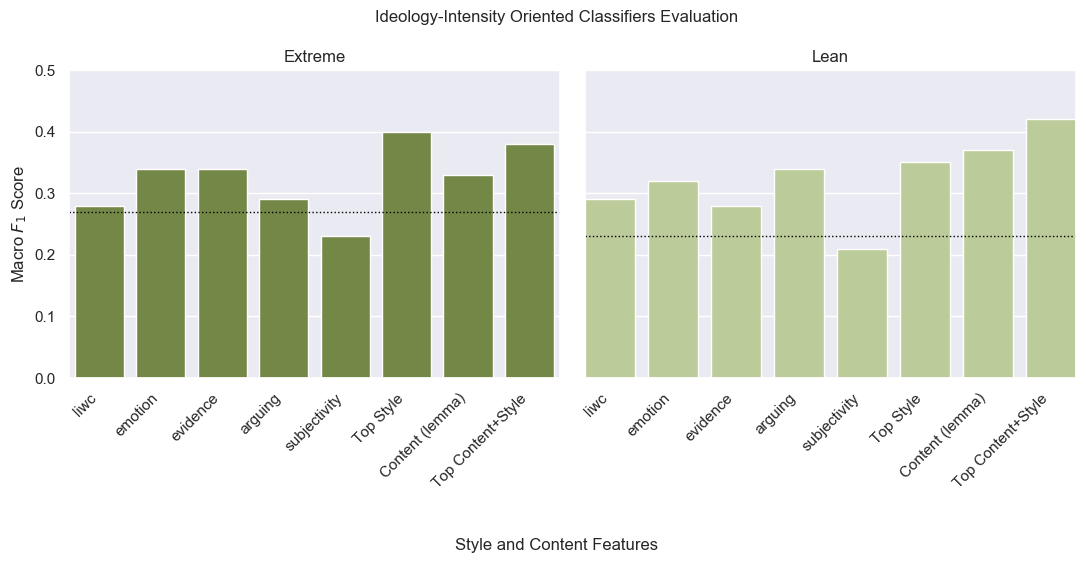

In [42]:
#sns.set_color_codes(sns.color_palette("mako_r", 2))
#plt.res
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False )
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(8,7)}, 
    style="white" # nicer layout
)
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(10,7)}, 
    #style="white" # nicer layout
)
f, (ax1, ax2)= plt.subplots(1, 2, sharex=False, sharey=True, figsize=(13,4
                                                                     ))


f.add_subplot(ax1)
#sns.barplot("feature", y="F1 Score", data=(data[data["f1-type"] == "Macro"]).copy())


ax1= sns.barplot(x="feature", y="macro", data=extreme, palette=sns.color_palette(["#77933c"]))
plt.gca().set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_title('Extreme')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('Macro $F_1$ Score')
#plt.gca().ylim(0.0, 0.50)
plt.gca().axhline(0.27, 0, 1,linewidth=1, color="#000000", linestyle=':') # blue a7c5e9   558fd5


f.add_subplot(ax2)
ax2= sns.barplot(x="feature", y="macro",
                data=lean,    
                 palette=sns.color_palette([ "#bed392"]))
                 
plt.gca().set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.gca().axhline(0.23, 0, 1,linewidth=1, color="#000000", linestyle=':') # redmacro


#fig.add_subplot(axes[1])
plt.gca().set_title('Lean')
#plt.gca().get_legend().remove()
#plt.setp([ax1, ax2])
#plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.margins(x=0, y=0)
f.text(0.5, -0.32, 'Style and Content Features', ha='center')
f.text(0.5, 1, 'Ideology-Intensity Oriented Classifiers Evaluation', ha='center')
plt.ylim(0.0, 0.50)
plt.show()

In [35]:
rolemodel_arr = [{"feature": 'liwc', 'macro': 0.32},
             {"feature": 'emotion', 'macro': 0.31},
             {"feature": 'evidence', 'macro': 0.24},
             {"feature": 'arguing', 'macro': 0.30},
             {"feature": 'subjectivity', 'macro': 0.29},
             {"feature": 'Top Style', 'macro': 0.37},
             {"feature": 'Content (lemma)', 'macro': 0.33},
             {"feature": 'Top Content+Style', 'macro': 0.36},]

other_arr = [{"feature": 'liwc', 'macro': 0.29},
             {"feature": 'emotion', 'macro': 0.30},
             {"feature": 'evidence', 'macro': 0.36},
             {"feature": 'arguing', 'macro': 0.29},
             {"feature": 'subjectivity', 'macro': 0.37},
             {"feature": 'Top Style', 'macro': 0.37},
             {"feature": 'Content (lemma)', 'macro': 0.34},
             {"feature": 'Top Content+Style', 'macro': 0.39},]

other = pd.DataFrame(other_arr)
rolemodel = pd.DataFrame(rolemodel_arr)

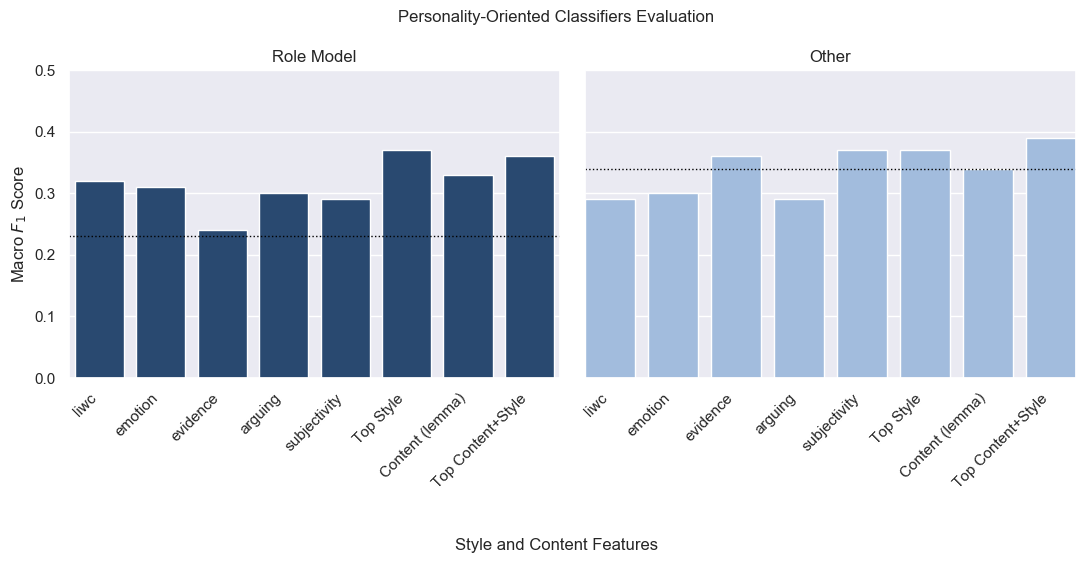

In [41]:
#sns.set_color_codes(sns.color_palette("mako_r", 2))
#plt.res
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False )
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(8,7)}, 
    style="white" # nicer layout
)
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(10,7)}, 
    #style="white" # nicer layout
)
f, (ax1, ax2)= plt.subplots(1, 2, sharex=False, sharey=True, figsize=(13,4
                                                                     ))


f.add_subplot(ax1)
#sns.barplot("feature", y="F1 Score", data=(data[data["f1-type"] == "Macro"]).copy())


ax1= sns.barplot(x="feature", y="macro", data=rolemodel, palette=sns.color_palette(["#1d487c"]))
plt.gca().set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_title('Role Model')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('Macro $F_1$ Score')
#plt.gca().ylim(0.0, 0.50)
plt.gca().axhline(0.23, 0, 1,linewidth=1, color="#000000", linestyle=':') # blue a7c5e9   558fd5


f.add_subplot(ax2)
ax2= sns.barplot(x="feature", y="macro",
                data=other,    
                 palette=sns.color_palette([ "#98bbe7"]))
                 
plt.gca().set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.gca().axhline(0.34, 0, 1,linewidth=1, color="#000000", linestyle=':') # redmacro


#fig.add_subplot(axes[1])
plt.gca().set_title('Other')
#plt.gca().get_legend().remove()
#plt.setp([ax1, ax2])
#plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.margins(x=0, y=0)
f.text(0.5, -0.32, 'Style and Content Features', ha='center')
f.text(0.5, 1, 'Personality-Oriented Classifiers Evaluation', ha='center')
plt.ylim(0.0, 0.50)
plt.show()